In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('Iris.csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

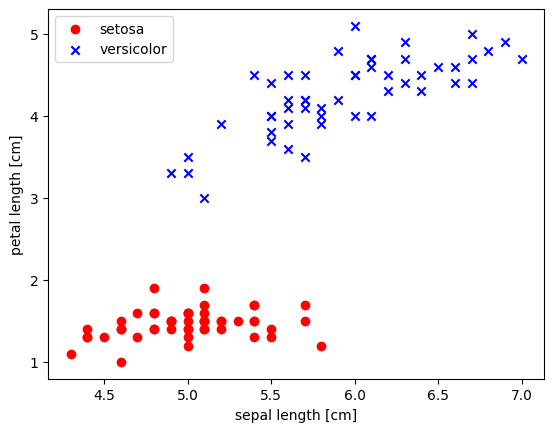

In [54]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o',
label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x',
label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [55]:
import numpy as np

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def predict(self, X):  # Define predict *BEFORE* fit
        return np.where(self.net_input(X) >= 0.0, 1, -1)

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))  # Now predict is defined
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

# Example usage (after defining X and y):
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

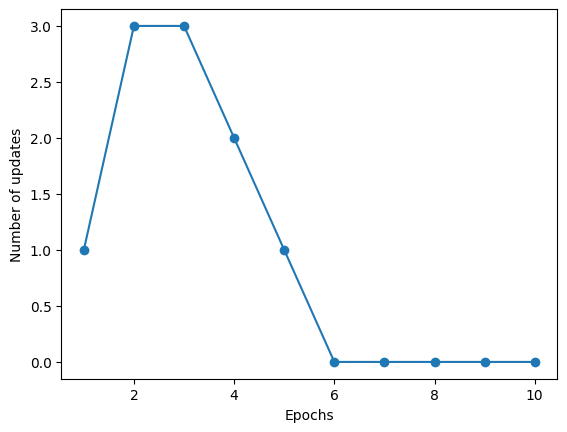

In [56]:
plt.plot(range(1, len(ppn.errors_) + 1),ppn.errors_,
marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

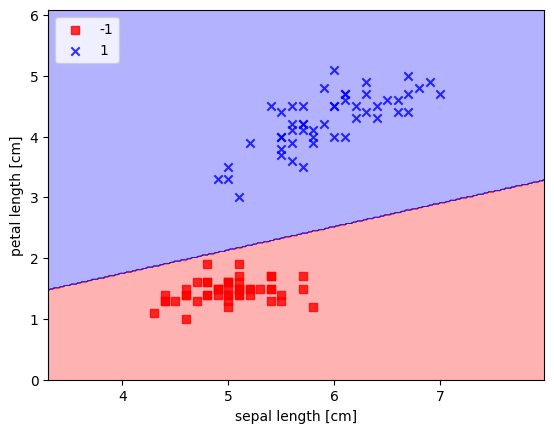

In [57]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),
    np.arange(x2_min, x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=cl)
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show();

In [58]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [59]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [60]:
data=df.drop_duplicates(subset="Species",)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [61]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

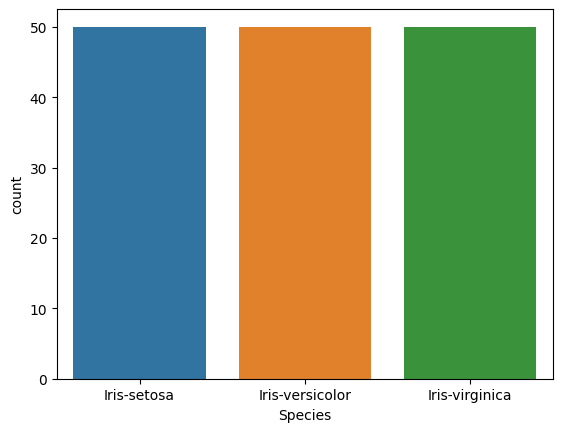

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Species', data=df, hue='Species', legend=False)
plt.show()

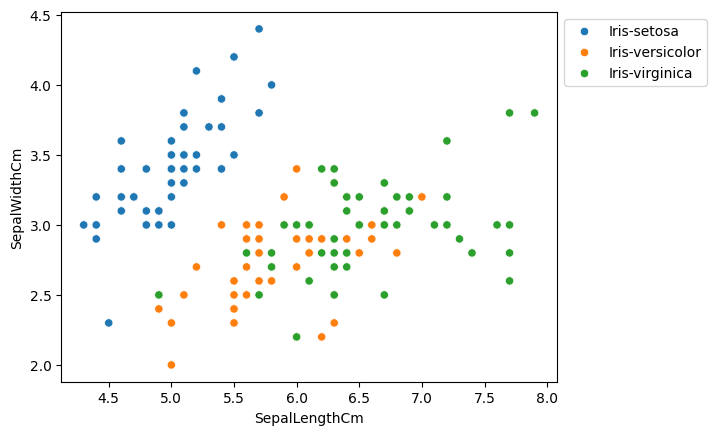

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',

hue='Species', data=df, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

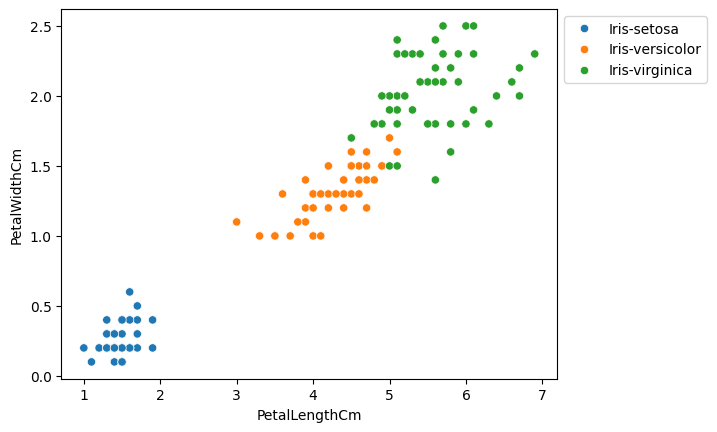

In [64]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',

hue='Species', data=df, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

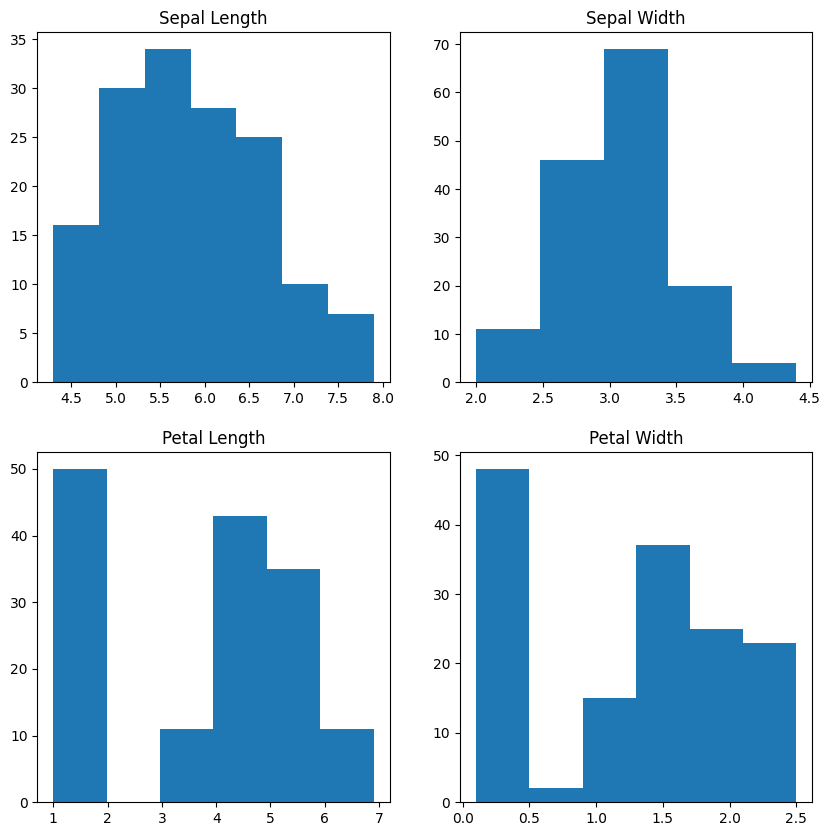

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['SepalLengthCm'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['SepalWidthCm'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['PetalLengthCm'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['PetalWidthCm'], bins=6);

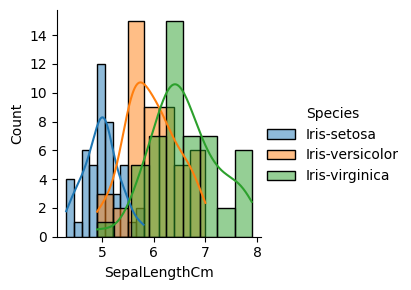

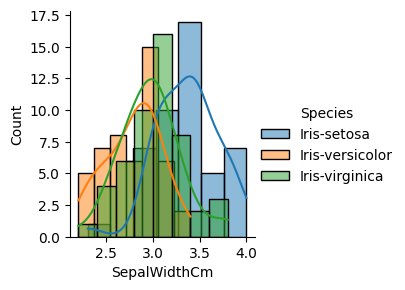

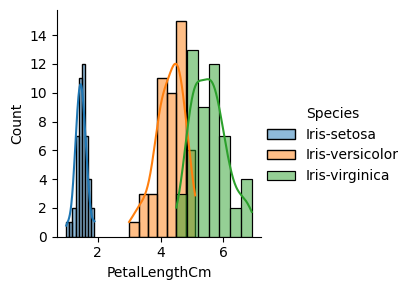

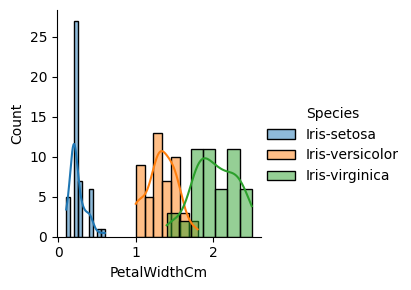

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plot = sns.FacetGrid(df, hue="Species")
plot.map_dataframe(sns.histplot, x="SepalLengthCm", hue=df["Species"], kde=True).add_legend()  # Updated

plot = sns.FacetGrid(df, hue="Species")
plot.map_dataframe(sns.histplot, x="SepalWidthCm", hue=df["Species"], kde=True).add_legend()  # Updated

plot = sns.FacetGrid(df, hue="Species")
plot.map_dataframe(sns.histplot, x="PetalLengthCm", hue=df["Species"], kde=True).add_legend()  # Updated

plot = sns.FacetGrid(df, hue="Species")
plot.map_dataframe(sns.histplot, x="PetalWidthCm", hue=df["Species"], kde=True).add_legend()  # Updated

plt.show()

In [67]:
import pandas as pd

# One-hot encode the 'Species' column
df = pd.get_dummies(df, columns=['Species'], prefix='Species')

# Calculate the correlation matrix
correlation_matrix = df.corr(method='pearson')
print(correlation_matrix)

                         SepalLengthCm  SepalWidthCm  PetalLengthCm  \
SepalLengthCm                 1.000000     -0.109369       0.871754   
SepalWidthCm                 -0.109369      1.000000      -0.420516   
PetalLengthCm                 0.871754     -0.420516       1.000000   
PetalWidthCm                  0.817954     -0.356544       0.962757   
Species_Iris-setosa          -0.717416      0.595601      -0.922688   
Species_Iris-versicolor       0.079396     -0.464700       0.201587   
Species_Iris-virginica        0.638020     -0.130901       0.721102   

                         PetalWidthCm  Species_Iris-setosa  \
SepalLengthCm                0.817954            -0.717416   
SepalWidthCm                -0.356544             0.595601   
PetalLengthCm                0.962757            -0.922688   
PetalWidthCm                 1.000000            -0.887510   
Species_Iris-setosa         -0.887510             1.000000   
Species_Iris-versicolor      0.118376            -0.500000 

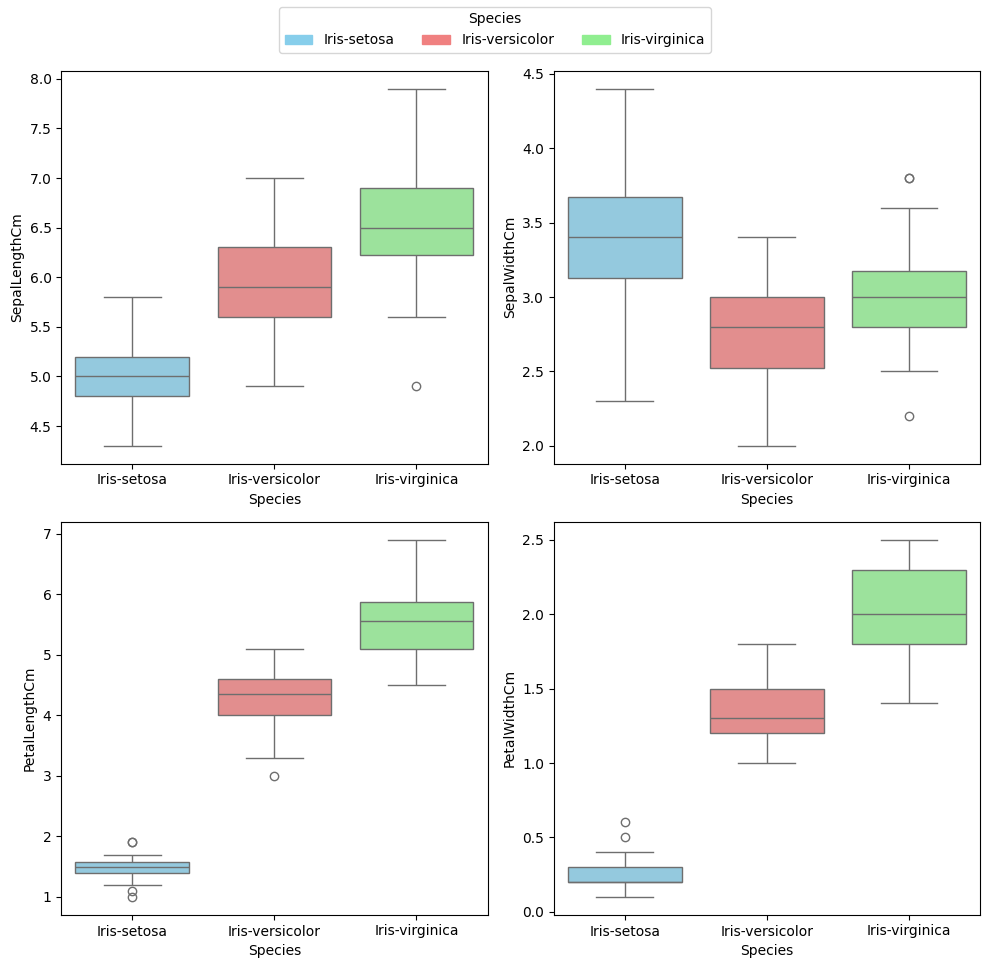

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset (make ABSOLUTELY sure this path is correct)
df = pd.read_csv('Iris.csv')  # Or the actual path if different

# Define a color palette (you can customize these colors)
my_palette = {"Iris-setosa": "skyblue", "Iris-versicolor": "lightcoral", "Iris-virginica": "lightgreen"}  # Example colors

def graph(feature_name):  # Take feature name as argument
    sns.boxplot(x="Species", y=feature_name, hue="Species", data=df, palette=my_palette)  # Correct x and y
    plt.ylabel(feature_name)  # Set y-axis label to feature name

plt.figure(figsize=(10, 10))

plt.subplot(221)
graph('SepalLengthCm')  # Pass feature name as string

plt.subplot(222)
graph('SepalWidthCm')  # Pass feature name as string

plt.subplot(223)
graph('PetalLengthCm')  # Pass feature name as string

plt.subplot(224)
graph('PetalWidthCm')  # Pass feature name as string

# Add the legend *ONCE* after all subplots are created
handles = [plt.Rectangle((0,0),1,1, color=my_palette[species]) for species in df['Species'].unique()]
plt.figlegend(handles, df['Species'].unique(), title="Species", loc='upper center', ncol=3) # ncol adjusts the number of columns in the legend

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlapping and make space for legend
plt.show()

<Axes: xlabel='SepalWidthCm'>

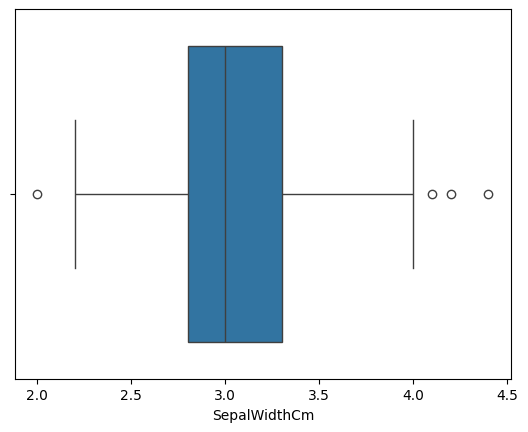

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Iris.csv')

sns.boxplot(x='SepalWidthCm', data=df)

Old Shape:  (150, 5)
New Shape:  (146, 5)


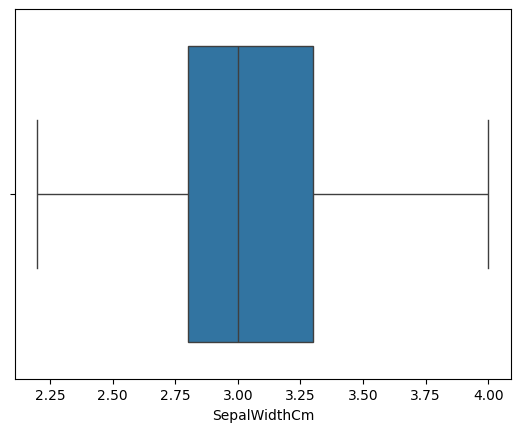

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('Iris.csv')

# IQR
Q1 = np.percentile(df['SepalWidthCm'], 25, interpolation='midpoint')
Q3 = np.percentile(df['SepalWidthCm'], 75, interpolation='midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound (Correctly access the indices)
upper = np.where(df['SepalWidthCm'] >= (Q3 + 1.5 * IQR))[0]  # [0] is crucial

# Lower bound (Correctly access the indices)
lower = np.where(df['SepalWidthCm'] <= (Q1 - 1.5 * IQR))[0]  # [0] is crucial


# Removing the Outliers (Handle potential empty arrays)
if len(upper) > 0:  # Check if upper bound outliers exist
    df.drop(upper, inplace=True)
if len(lower) > 0:  # Check if lower bound outliers exist
    df.drop(lower, inplace=True)



print("New Shape: ", df.shape)

sns.boxplot(x='SepalWidthCm', data=df)
plt.show()

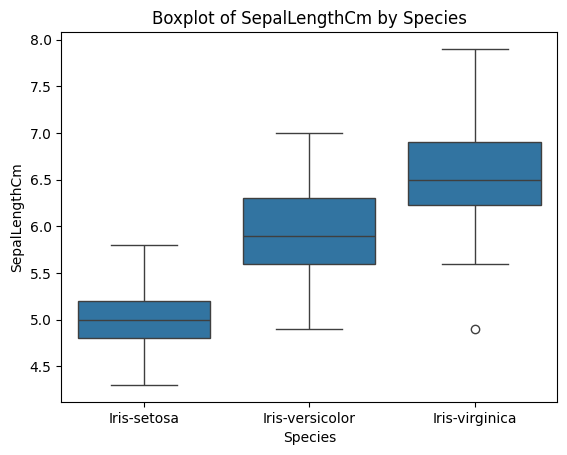

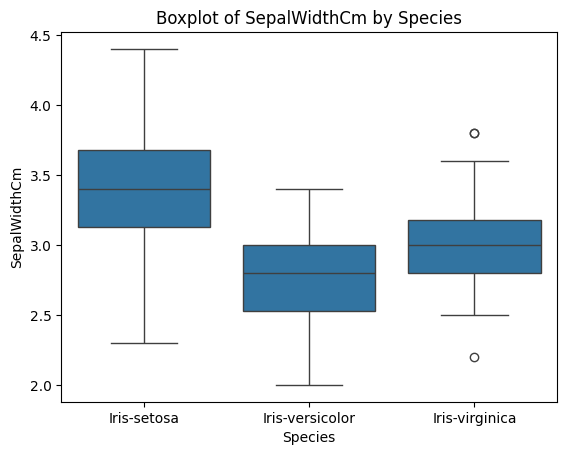

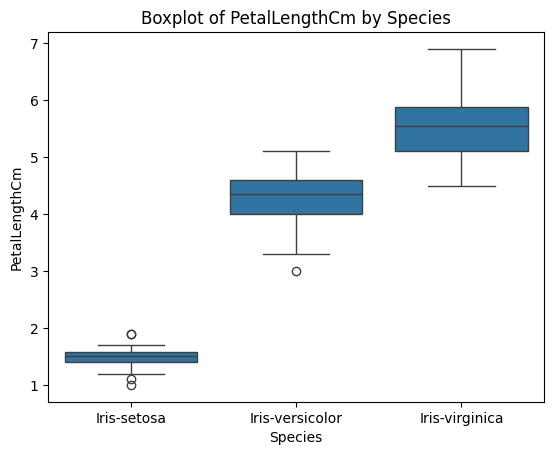

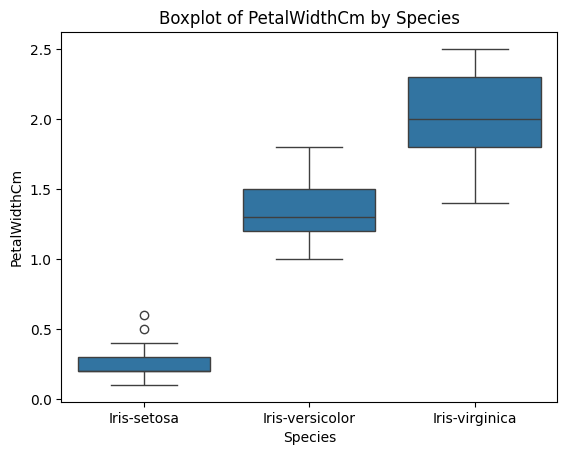

Old Shape:  (150, 5)
New Shape:  (146, 5)


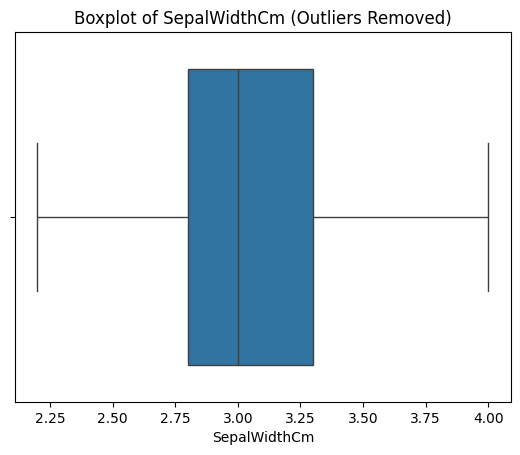

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30

Accuracy: 0.9333333333333333


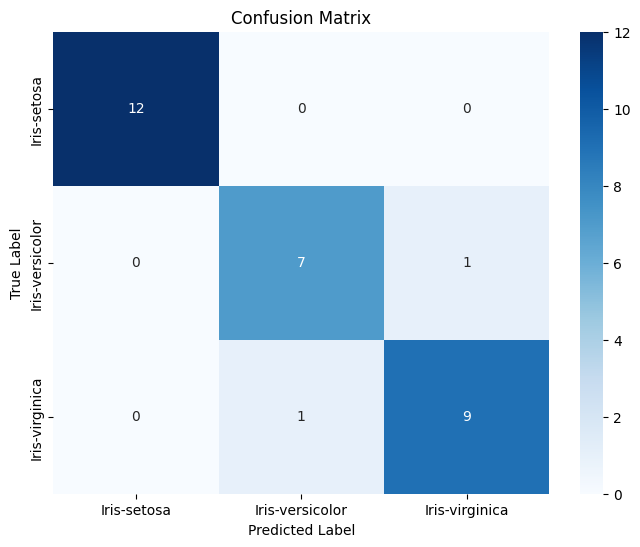

Cross-validation Scores: [0.96666667 0.96551724 0.93103448 0.93103448 1.        ]
Average Cross-validation Accuracy: 0.9588505747126437


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier  # Changed to RandomForest
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset (Correct the path if needed)
df = pd.read_csv('Iris.csv')  # Or your actual path

# --- Data Exploration and Visualization ---
def graph(y):
    sns.boxplot(x="Species", y=y, data=df)
    plt.title(f"Boxplot of {y} by Species")
    plt.show()

graph('SepalLengthCm')
graph('SepalWidthCm')
graph('PetalLengthCm')
graph('PetalWidthCm')

# --- Outlier Removal ---
Q1 = np.percentile(df['SepalWidthCm'], 25, interpolation='midpoint')
Q3 = np.percentile(df['SepalWidthCm'], 75, interpolation='midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

upper = np.where(df['SepalWidthCm'] >= (Q3 + 1.5 * IQR))[0]
lower = np.where(df['SepalWidthCm'] <= (Q1 - 1.5 * IQR))[0]

if len(upper) > 0:
    df.drop(upper, inplace=True)
if len(lower) > 0:
    df.drop(lower, inplace=True)

print("New Shape: ", df.shape)

sns.boxplot(x='SepalWidthCm', data=df)
plt.title("Boxplot of SepalWidthCm (Outliers Removed)")
plt.show()

# --- Model Training and Evaluation ---

# 1. Data Preparation (Use df AFTER outlier removal)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Model Training
rf = RandomForestClassifier(random_state=42)  # Changed to RandomForest, added random_state
rf.fit(X_train, y_train)

# 3. Model Evaluation
y_pred = rf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=df['Species'].unique(), 
            yticklabels=df['Species'].unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Cross-validation (Use df AFTER outlier removal)
cv_scores = cross_val_score(rf, X, y, cv=5)  # Use RandomForest for cross-validation
print("Cross-validation Scores:", cv_scores)
print("Average Cross-validation Accuracy:", cv_scores.mean())


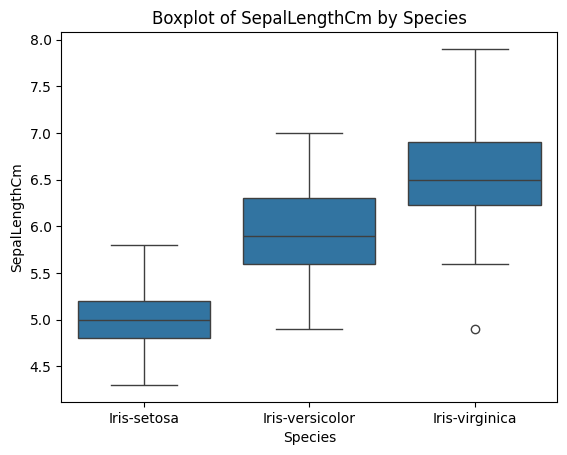

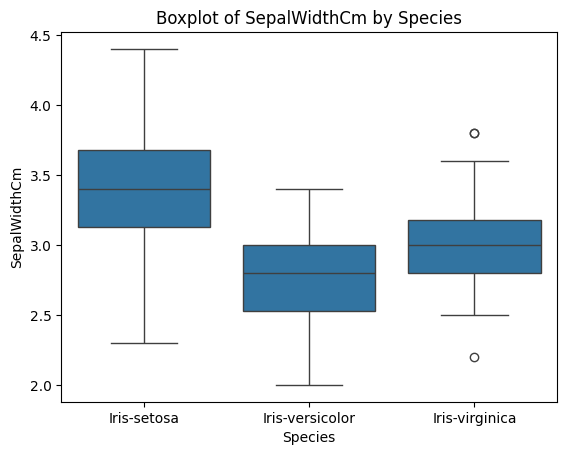

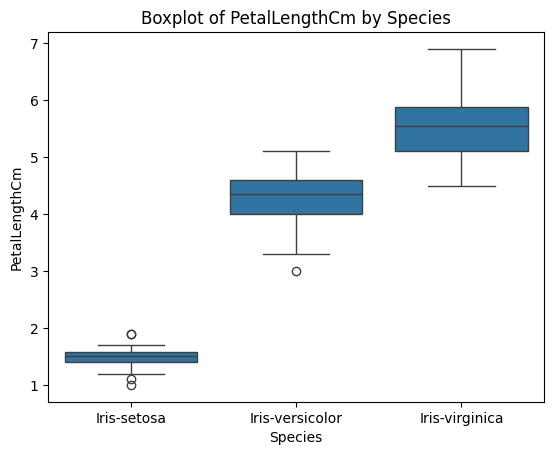

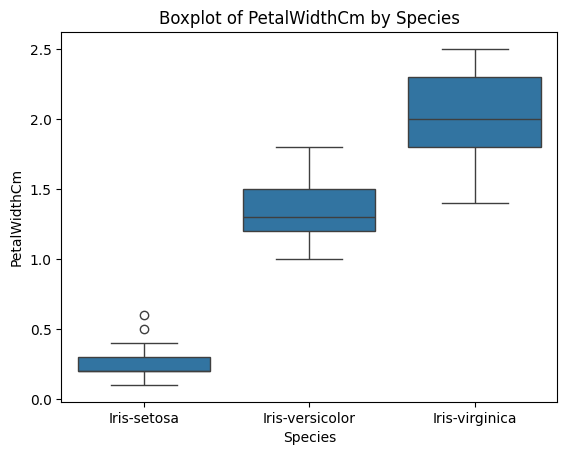

Old Shape:  (150, 5)
New Shape:  (146, 5)


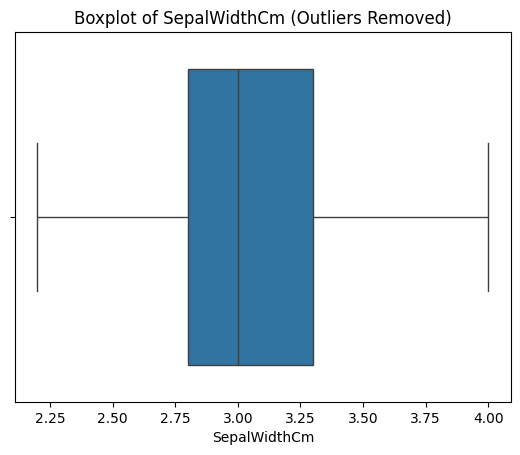


Confusion Matrix:


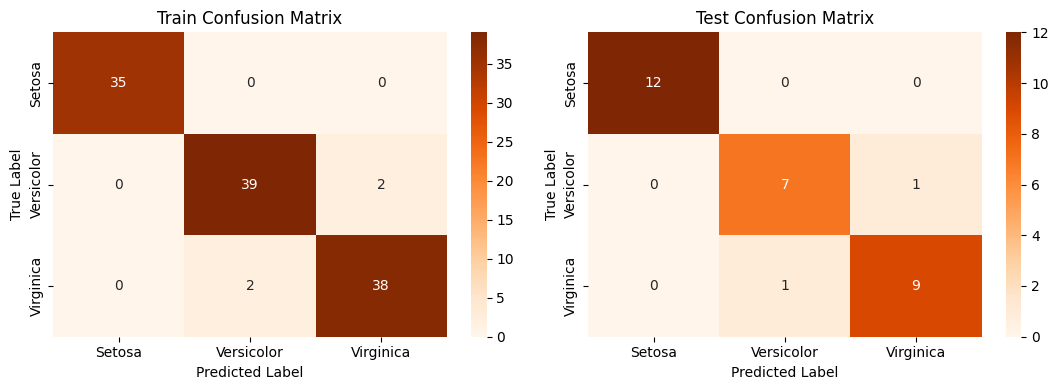


Train Classification Report:
|                 |   precision |   recall |   f1-score |    support |
|:----------------|------------:|---------:|-----------:|-----------:|
| Iris-setosa     |    1        | 1        |   1        |  35        |
| Iris-versicolor |    0.95122  | 0.95122  |   0.95122  |  41        |
| Iris-virginica  |    0.95     | 0.95     |   0.95     |  40        |
| accuracy        |    0.965517 | 0.965517 |   0.965517 |   0.965517 |
| macro avg       |    0.967073 | 0.967073 |   0.967073 | 116        |
| weighted avg    |    0.965517 | 0.965517 |   0.965517 | 116        |

Test Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |    1        | 1        |   1        | 12        |
| Iris-versicolor |    0.875    | 0.875    |   0.875    |  8        |
| Iris-virginica  |    0.9      | 0.9      |   0.9      | 10        |
| accuracy        |    

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset (Correct the path if needed)
df = pd.read_csv('Iris.csv')  # Or your actual path

# --- Data Exploration and Visualization ---
def graph(y):
    sns.boxplot(x="Species", y=y, data=df)
    plt.title(f"Boxplot of {y} by Species")
    plt.show()

graph('SepalLengthCm')
graph('SepalWidthCm')
graph('PetalLengthCm')
graph('PetalWidthCm')

# --- Outlier Removal ---
Q1 = np.percentile(df['SepalWidthCm'], 25, interpolation='midpoint')
Q3 = np.percentile(df['SepalWidthCm'], 75, interpolation='midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

upper = np.where(df['SepalWidthCm'] >= (Q3 + 1.5 * IQR))[0]
lower = np.where(df['SepalWidthCm'] <= (Q1 - 1.5 * IQR))[0]

if len(upper) > 0:
    df.drop(upper, inplace=True)
if len(lower) > 0:
    df.drop(lower, inplace=True)

print("New Shape: ", df.shape)

sns.boxplot(x='SepalWidthCm', data=df)
plt.title("Boxplot of SepalWidthCm (Outliers Removed)")
plt.show()

# --- Model Training and Evaluation ---

# 1. Data Preparation (Use df AFTER outlier removal)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Model Instantiation (Create the knn object)
knn = KNeighborsClassifier(n_neighbors=3)  # You can try other k values

# 3. Model Training (Fit the model)
knn.fit(X_train, y_train)

# 4. Model Evaluation (Call evaluate_model NOW)
def evaluate_model(model, x_train, x_test, y_train, y_test):
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'], cmap="Oranges", fmt='.4g', ax=ax[0]) 
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'], cmap="Oranges", fmt='.4g', ax=ax[1]) 
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()

    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score  # Return the scores!


model_scores = evaluate_model(knn, X_train, X_test, y_train, y_test)

score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])
score['Scores'] = model_scores

print(score)



In [ ]:
** IRIS CLASSIFICATION REPORT **

In [ ]:
**IRIS CLASSIFICATION REPORT**

**Iris Flower Classification Project Report**

This project aimed to classify Iris flowers into three species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica, using machine learning. The tuned Random Forest model was selected as the final prediction model.  A KNN model was also evaluated.

**Data Exploration:**

Exploratory data analysis provided insights into the features and their distributions. Distinct characteristics were observed for Iris-Setosa compared to the other two species. 
    
**Data Preprocessing:**

Data preprocessing steps, including *( "outlier removal using the IQR method on SepalWidthCm," and "one-hot encoding of categorical variables ")*, were performed to prepare the data for modeling. 

**Model Selection:**

Two models were evaluated: KNN and Random Forest. The tuned Random Forest was selected as the final model due to its high accuracy and robust performance on the Iris dataset. The KNN model served as a baseline for comparison.

**Model Training and Evaluation:**

Both models were trained on the training data and evaluated on the test data using appropriate metrics (precision, recall, f1-score, and accuracy).

**Key Findings:**

**Random Forest Model:**

*   **Accuracy:** Test Accuracy: 0.93
*   **Species Performance:**
    *   Iris-setosa: Precision: 1.00, Recall: 1.00, F1-score: 1.00
    *   Iris-versicolor: Precision: 0.88, Recall: 0.88, F1-score: 0.88
    *   Iris-virginica: Precision: 0.90, Recall: 0.90, F1-score: 0.90
*   **Confusion Matrix:**
    ```
    [[12  0  0]
     [ 0  7  1]
     [ 0  1  9]]
    ```

**KNN Model:**

*   **Accuracy:** Test Accuracy: 0.93
*   **Species Performance:**
    *   Iris-setosa: Precision: 1.00, Recall: 1.00, F1-score: 1.00
    *   Iris-versicolor: Precision: 0.875, Recall: 0.875, F1-score: 0.875
    *   Iris-virginica: Precision: 0.9, Recall: 0.9, F1-score: 0.9

**Challenges and Future Work:**

Challenges encountered during the project included *( "finding the optimal hyperparameters for the Random Forest," and "exploring feature engineering to improve performance").*  Future work may involve *( "exploring other advanced modeling techniques like Gradient Boosting," or "gathering more data to improve model generalizability").*

**Practical Application:**

This Iris flower classification model can be applied in real-world scenarios, such as botany and horticulture, to automate Iris species identification.

**Conclusion:**

This project successfully employed a tuned Random Forest model to classify Iris species. The model demonstrated high accuracy and provided valuable insights into feature importance for species differentiation. The KNN model also performed well. Further refinements may lead to even more accurate and reliable classification models.
